## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = df["Mouse ID"].count()
num_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = df[df.duplicated(["Mouse ID", "Timepoint"])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_df = df[df.duplicated(["Mouse ID"])]
all_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop_duplicates(["Mouse ID"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Generate a summary statistics table of median
median = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# Generate a summary statistics table of variance
variance = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [10]:
# Generate a summary statistics table of std dev
std_dev = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std_dev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# Generate a summary statistics table of SEM
sem = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

stat_table = pd.DataFrame({ "Mean": mean,
                           "Median": median,
                           "Variance": variance,
                           "Standard Deviantion": std_dev,
                           "Standard Error of Mean" : sem,
    
})
stat_table

,Mean,Median,Variance,Standard Deviantion,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [13]:
df_drug = df.groupby("Drug Regimen") ["Mouse ID"].count()
df_drug

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

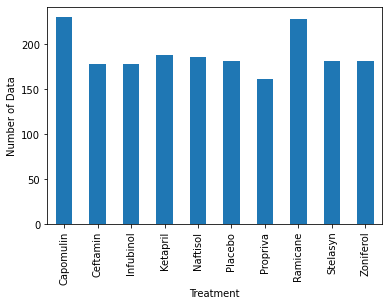

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
df_drug.plot(kind="bar", x="Drug Regimen", y = "Mouse ID")
plt.xlabel("Treatment")
plt.ylabel("Number of Data")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

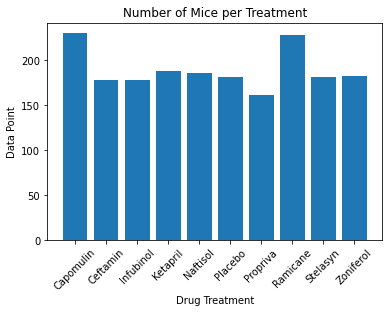

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

label = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
data = [230, 178,178,188, 186, 181, 161, 228, 181, 182]
index = np.arange(len(label))
plt.bar(index, data)
plt.xlabel("Drug Treatment")
plt.ylabel("Data Point")
plt.xticks(index, label, fontsize=10, rotation = 45)
plt.title("Number of Mice per Treatment")
plt.show

In [16]:
# Find the count of sexes
sex_df = df.groupby("Sex")["Mouse ID"].count()
sex_df

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

<AxesSubplot:ylabel='Mouse ID'>

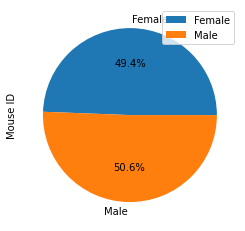

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_piepd = df.groupby("Sex").count().plot(kind="pie", y = "Mouse ID", autopct = "%1.1f%%")
df_piepd

<function matplotlib.pyplot.show(close=None, block=None)>

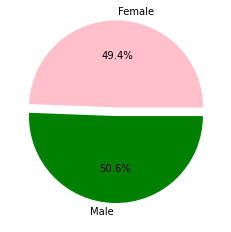

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female", "Male"]
explode = (0.1, 0.0)
colors = ("pink", "green")
plt.pie(sex_df, labels = gender, explode = explode, colors = colors, autopct="%1.1f%%")
plt.show

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


In [20]:
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = df.groupby("Mouse ID")["Timepoint"].idxmax()
greatest_timepoint

Mouse ID
a203     463
a251     473
a262     483
a275     493
a366     500
        ... 
z435    1862
z578      84
z581    1872
z795    1882
z969    1892
Name: Timepoint, Length: 249, dtype: int64

In [21]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_df = pd.merge(df, greatest_timepoint, on=("Mouse ID","Timepoint"), how="left")
last_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"]

In [23]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

In [24]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [25]:
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    tumor_vol = last_df["Tumor Volume (mm3)"].loc[last_df["Drug Regimen"]== drug]
tumor_vol

484     45.000000
485     46.795257
486     47.371343
487     49.734404
488     50.513437
          ...    
1851    57.173538
1852    59.033275
1853    61.153140
1854    63.469549
1855    64.729837
Name: Tumor Volume (mm3), Length: 178, dtype: float64

In [26]:
# add subset 


In [45]:
# Determine outliers using upper and lower bounds
for drug in treatments:
    quartiles = tumor_vol.quantile([0.25, 0.5, .75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    print(f"{drug} IQR is: {iqr}")
    lower_bound = q1-(1.5 * iqr)
    upper_bound = q3-(1.5 * iqr)
    print(f"{drug} below {lower_bound} could be outliers")
    print(f"{drug} above {upper_bound} could be outliers")

Capomulin IQR is: 9.5930104575
Capomulin below 32.818911426250004 could be outliers
Capomulin above 42.411921883750004 could be outliers
Ramicane IQR is: 9.5930104575
Ramicane below 32.818911426250004 could be outliers
Ramicane above 42.411921883750004 could be outliers
Infubinol IQR is: 9.5930104575
Infubinol below 32.818911426250004 could be outliers
Infubinol above 42.411921883750004 could be outliers
Ceftamin IQR is: 9.5930104575
Ceftamin below 32.818911426250004 could be outliers
Ceftamin above 42.411921883750004 could be outliers


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


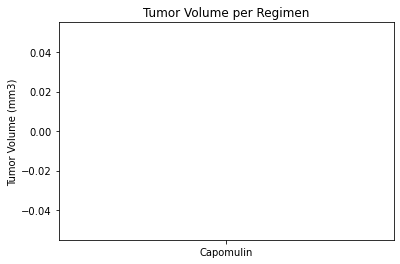

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title("Tumor Volume per Regimen")
ax.set_xticklabels(treatments)
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

In [29]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = df.loc[df["Drug Regimen"]== "Capomulin"]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [30]:
# Select a single mouse s185
capomulin_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capomulin_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


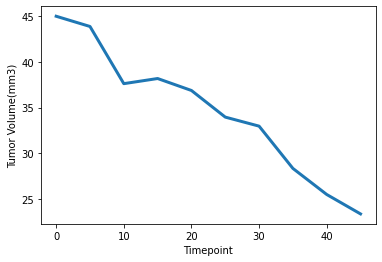

In [31]:
# plot data
x_axis = capomulin_mouse_df["Timepoint"]
y_axis = capomulin_mouse_df["Tumor Volume (mm3)"]
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume(mm3)")
plt.plot(x_axis, y_axis, linewidth=3)
plt.show()

In [32]:
capomulin_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_df = last_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,k403,16,45.000000
1,k403,16,38.825898
2,k403,16,35.014271
3,k403,16,34.223992
4,k403,16,32.997729


In [34]:
avg_weight_df = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean())
avg_weight_df

,,Tumor Volume (mm3)
Mouse ID,Weight (g),
a203,23,56.312708
a251,25,55.237095
a262,29,58.611631
a275,28,52.770965
a366,29,54.639906
...,...,...
z435,26,46.942214
z578,16,38.411510
z581,25,53.979584


KeyError: 'Weight (g)'

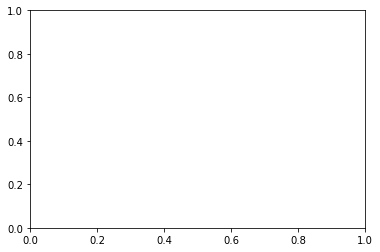

In [35]:
avg_weight_df.plot(kind="scatter", x = "Weight (g)", y = "Average Volume", grid = True, title = "Avgerage Weight vs Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x, y)
# for mouse weight and average tumor volume for the Capomulin regimen
